In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:/Users/junji/OneDrive/Desktop/Marquette Subjects/COSC 6330/us-vehicle-fuel-economy-data-2022.xlsx")
data.head()

,Year,Manufacturer,Model,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,...,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,baseModel
0,2022,Kia,Stinger RWD,14.875500,0,0,0,18,17,0,...,NaN,0,NaN,2021-02-02,2021-09-02,Y,0,0,0,Stinger
1,2022,Mitsubishi,Eclipse Cross 2WD,11.442692,0,0,0,25,25,0,...,NaN,0,NaN,2021-02-02,2021-09-02,N,0,0,0,Eclipse Cross
2,2022,Mitsubishi,Eclipse Cross ES 4WD,11.442692,0,0,0,25,25,0,...,NaN,0,NaN,2021-02-02,2021-09-02,N,0,0,0,Eclipse Cross
3,2022,Genesis,G70 RWD,14.167143,0,0,0,18,17,0,...,NaN,0,NaN,2021-03-03,2021-08-24,N,0,0,0,G70
4,2022,Hyundai,Kona AWD,9.917000,0,0,0,28,27,0,...,NaN,0,NaN,2021-03-11,2021-08-24,Y,0,0,0,Kona


In [3]:
my_data = data.iloc[:, [3, 7, 8, 14, 17, 18, 19, 30, 31, 35, 37, 38, 60, 62]]
my_data.head()

,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,feScore,fuelCost08,ghgScore,highway08,highway08U,UCity,UHighway
0,14.875500,18,17,437,437,20,20,4,3200,4,25,25,22.0791,32.3866
1,11.442692,25,25,338,338,26,26,5,1950,5,28,27,33.0773,42.2961
2,11.442692,25,25,337,337,26,26,5,1950,5,28,27,32.3606,40.9189
3,14.167143,18,17,433,433,21,20,4,3050,4,27,26,21.3151,33.9222
4,9.917000,28,27,301,301,30,29,6,1700,6,33,32,36.2024,47.3936


In [4]:
X = my_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13]]
X.head()

,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,feScore,fuelCost08,highway08,highway08U,UCity,UHighway
0,14.875500,18,17,437,437,20,20,4,3200,25,25,22.0791,32.3866
1,11.442692,25,25,338,338,26,26,5,1950,28,27,33.0773,42.2961
2,11.442692,25,25,337,337,26,26,5,1950,28,27,32.3606,40.9189
3,14.167143,18,17,433,433,21,20,4,3050,27,26,21.3151,33.9222
4,9.917000,28,27,301,301,30,29,6,1700,33,32,36.2024,47.3936


In [5]:
y = my_data.iloc[:, [9]]
y.head()

,ghgScore
0,4
1,5
2,5
3,4
4,6


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
n_neighbours_range= range(1,20)
knn_scores = []
kfolds = KFold(n_splits=5, shuffle=True, random_state=1234)
for n_neighbors in n_neighbours_range:
    clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)

    original_scores_knn = cross_val_score(clf_knn, X_train, y_train.values.ravel(), cv=kfolds, scoring='f1_macro')
    knn_scores.append(original_scores_knn.mean())

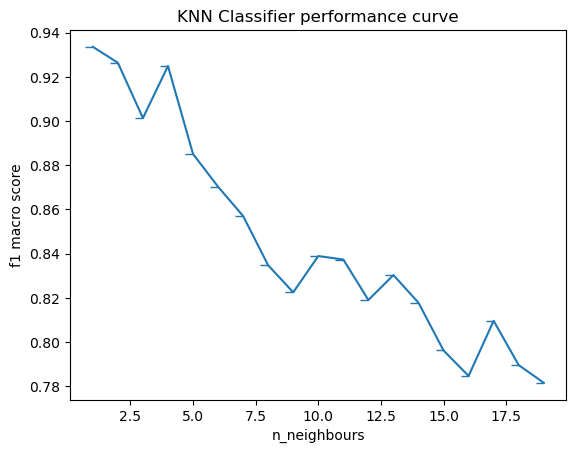

In [8]:
plt.plot (n_neighbours_range, knn_scores, marker = 0)
plt.title ("KNN Classifier performance curve")
plt.xlabel ('n_neighbours')
plt.ylabel("f1 macro score")
plt.show()

In [9]:
knn_test_scores = []
for n_neighbors in n_neighbours_range:
    clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    original_scores_knn = cross_val_score(clf_knn, X_test, y_test.values.ravel(), cv=kfolds, scoring='f1_macro')
    knn_test_scores.append(original_scores_knn.mean())

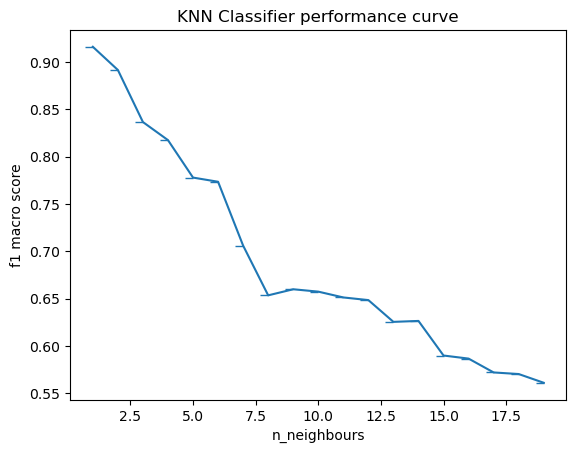

In [10]:
plt.plot (n_neighbours_range, knn_test_scores, marker = 0)
plt.title ("KNN Classifier performance curve")
plt.xlabel ('n_neighbours')
plt.ylabel("f1 macro score")
plt.show()

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
clf1 = MultinomialNB()
clf2 = BernoulliNB()

In [12]:
from sklearn.preprocessing import MaxAbsScaler
myScaler = MaxAbsScaler()
scaled_feature_vectors = myScaler.fit_transform(X_train)

In [13]:
score_1 = cross_val_score(clf1, X_train, y_train.values.ravel(), cv = kfolds, scoring = "f1_macro")
score_2 = cross_val_score(clf2, X_train, y_train.values.ravel(), cv = kfolds, scoring = "f1_macro")
print("Scores with MaxAbsScaler - ", score_1)
print("Scores with MaxAbsScaler - ", score_2)

Scores with MaxAbsScaler -  [0.66524251 0.64121527 0.67342717 0.63056342 0.66531873]
Scores with MaxAbsScaler -  [0.13927928 0.13604183 0.15741097 0.17299612 0.13647643]


In [14]:
transformer = myScaler.fit(X_train)
X_new = transformer.transform(X_train)

In [15]:
from sklearn.svm import SVC
clf_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, )
clf_svc = SVC(kernel='rbf', C=1.0, gamma='scale')
original_scores_knn = cross_val_score(clf_knn, X_train, y_train.values.ravel(), cv=kfolds, scoring='f1_macro')
scaled_scores_knn= cross_val_score(clf_knn, X_new, y_train.values.ravel(), cv=kfolds, scoring='f1_macro')
original_scores_svc = cross_val_score(clf_svc, X_train, y_train.values.ravel(), cv=kfolds, scoring='f1_macro')
scaled_scores_svc = cross_val_score(clf_svc, X_new, y_train.values.ravel(), cv=kfolds, scoring='f1_macro')

[0.8850816595661455, 0.8843088517826644]


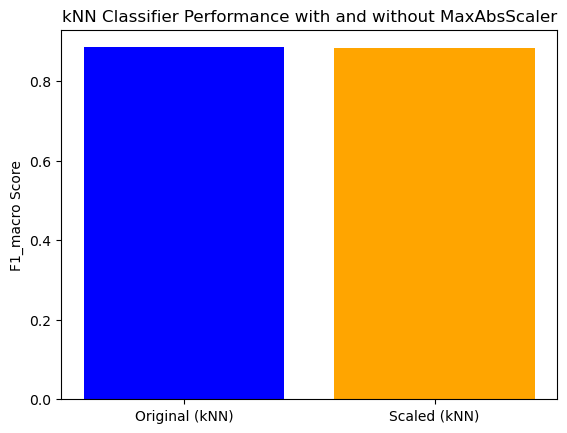

In [16]:
labels_knn = ['Original (kNN)', 'Scaled (kNN)']
scores_knn = [original_scores_knn.mean(), scaled_scores_knn.mean()]
print(scores_knn)
plt.bar(labels_knn, scores_knn, color=['blue', 'orange'])
plt.ylabel('F1_macro Score')
plt.title('kNN Classifier Performance with and without MaxAbsScaler')
plt.show()

[0.40591522913092604, 0.8907431980523359]


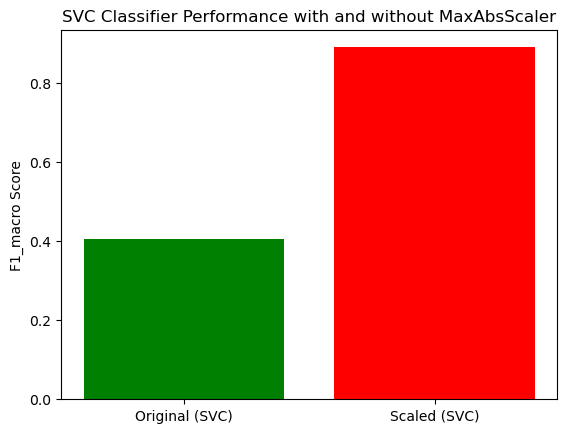

In [17]:
labels_svc = ['Original (SVC)', 'Scaled (SVC)']
scores_svc = [original_scores_svc.mean(), scaled_scores_svc.mean()]
print(scores_svc)
plt.bar(labels_svc, scores_svc, color=['green', 'red'])
plt.ylabel('F1_macro Score')
plt.title('SVC Classifier Performance with and without MaxAbsScaler')
plt.show()

In [18]:
myScaler = MaxAbsScaler()
test_feature_vectors = myScaler.fit_transform(X_test)
score_3 = cross_val_score(clf1, X_test, y_test.values.ravel(), cv = kfolds, scoring = "f1_macro")
score_4 = cross_val_score(clf2, X_test, y_test.values.ravel(), cv=kfolds, scoring = "f1_macro")
print("Scores with MaxAbsScaler - ", score_3)
print("Scores with MaxAbsScaler - ", score_4)

Scores with MaxAbsScaler -  [0.67737694 0.69955284 0.64191551 0.55145055 0.6065942 ]
Scores with MaxAbsScaler -  [0.12801151 0.13240741 0.14448836 0.15313895 0.13454106]


In [19]:
test_transformer = myScaler.fit(X_test)
test_new = transformer.transform(X_test)

[0.7778128181918573, 0.8628833891249912]


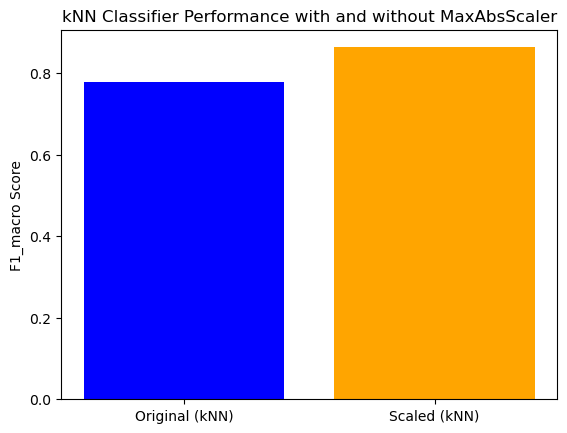

In [20]:
original_scores_knn_test = cross_val_score(clf_knn, X_test, y_test.values.ravel(), cv=kfolds, scoring='f1_macro')
scaled_scores_knn_test= cross_val_score(clf_knn, test_new, y_test.values.ravel(), cv=kfolds, scoring='f1_macro')
labels_knn_test = ['Original (kNN)', 'Scaled (kNN)']
scores_knn_test = [original_scores_knn_test.mean(), scaled_scores_knn_test.mean()]
print(scores_knn_test)
plt.bar(labels_knn_test, scores_knn_test, color=['blue', 'orange'])
plt.ylabel('F1_macro Score')
plt.title('kNN Classifier Performance with and without MaxAbsScaler')
plt.show()

In [21]:
original_scores_svc_test = cross_val_score(clf_svc, X_test, y_test.values.ravel(), cv=kfolds, scoring='f1_macro')
scaled_scores_svc_test = cross_val_score(clf_svc, test_new, y_test.values.ravel(), cv=kfolds, scoring='f1_macro')

[0.413789135965, 0.6812640902800471]


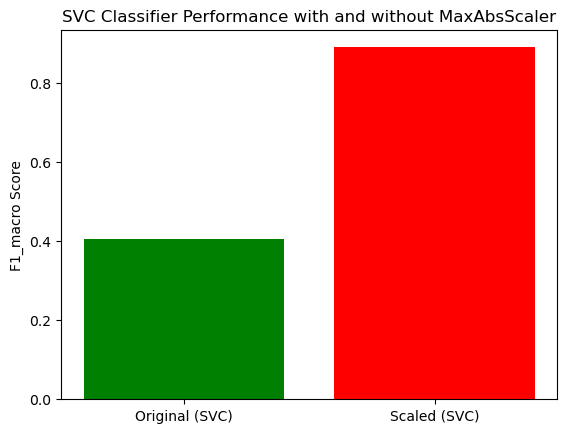

In [22]:
labels_svc_test = ['Original (SVC)', 'Scaled (SVC)']
scores_svc_test = [original_scores_svc_test.mean(), scaled_scores_svc_test.mean()]
print(scores_svc_test)
plt.bar(labels_svc, scores_svc, color=['green', 'red'])
plt.ylabel('F1_macro Score')
plt.title('SVC Classifier Performance with and without MaxAbsScaler')
plt.show()

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

chi2_scores = []
mutual_information_scores = []
k_range = range(1, min(X_train.shape[1], 21))  # Adjusted the range to avoid exceeding the number of features
for k in k_range:
    X_chi2 = SelectKBest(chi2, k=k).fit_transform(X_train, y_train)  # Changed 'all' to k
    clf_chi2 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    chi2_scores.append(np.mean(cross_val_score(clf_chi2, X_chi2, y_train.values.ravel(), cv=kfolds, scoring='f1_macro')))
    #print(f"Number of features after chi2 selection (k={k}): {X_chi2.shape[1]}")

    X_mutual_information = SelectKBest(mutual_info_classif, k=k).fit_transform(X_train, y_train.values.ravel())  # Changed 'all' to k
    clf_mutual_information = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    #print(f"Number of features after mutual_info selection (k={k}): {X_mutual_information.shape[1]}")
    
    mutual_information_scores.append(np.mean(cross_val_score(clf_mutual_information, X_mutual_information, y_train.values.ravel(), cv=kfolds, scoring='f1_macro'))) 


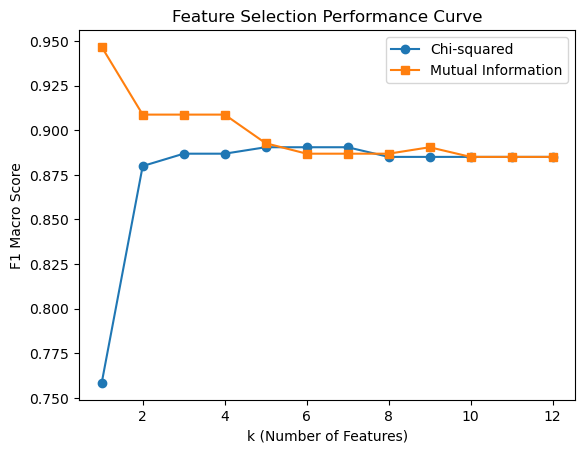

In [24]:
plt.plot(k_range, chi2_scores, marker='o', label='Chi-squared')
plt.plot(k_range, mutual_information_scores, marker='s', label='Mutual Information')
plt.title('Feature Selection Performance Curve')
plt.xlabel('k (Number of Features)')
plt.ylabel('F1 Macro Score')
plt.legend()
plt.show()

In [25]:
chi2_scores = []
mutual_information_scores = []
k_range = range(1, min(X_train.shape[1], 21))  # Adjusted the range to avoid exceeding the number of features
for k in k_range:
    X_chi2 = SelectKBest(chi2, k=k).fit_transform(X_test, y_test)  # Changed 'all' to k
    clf_chi2 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    chi2_scores.append(np.mean(cross_val_score(clf_chi2, X_chi2, y_test.values.ravel(), cv=kfolds, scoring='f1_macro')))
    #print(f"Number of features after chi2 selection (k={k}): {X_chi2.shape[1]}")

    X_mutual_information = SelectKBest(mutual_info_classif, k=k).fit_transform(X_test, y_test.values.ravel())  # Changed 'all' to k
    clf_mutual_information = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    #print(f"Number of features after mutual_info selection (k={k}): {X_mutual_information.shape[1]}")
    
    mutual_information_scores.append(np.mean(cross_val_score(clf_mutual_information, X_mutual_information, y_test.values.ravel(), cv=kfolds, scoring='f1_macro'))) 


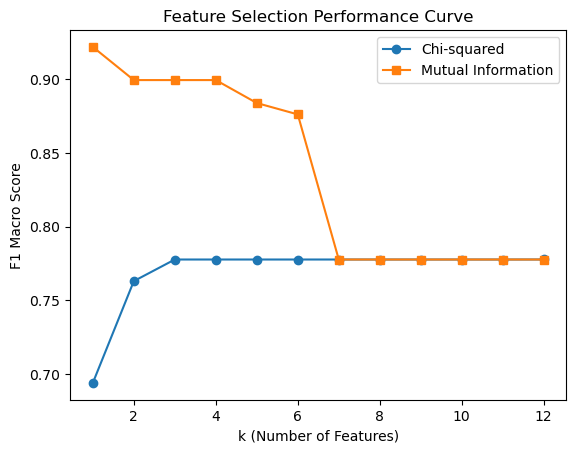

In [26]:
plt.plot(k_range, chi2_scores, marker='o', label='Chi-squared')
plt.plot(k_range, mutual_information_scores, marker='s', label='Mutual Information')
plt.title('Feature Selection Performance Curve')
plt.xlabel('k (Number of Features)')
plt.ylabel('F1 Macro Score')
plt.legend()
plt.show()

Classifier 1 Mean F1-Macro: 0.66, CI: (0.63, 0.67)
Classifier 2 Mean F1-Macro: 0.15, CI: (0.14, 0.17)


Text(0.5, 0, 'top 2 classifiers')

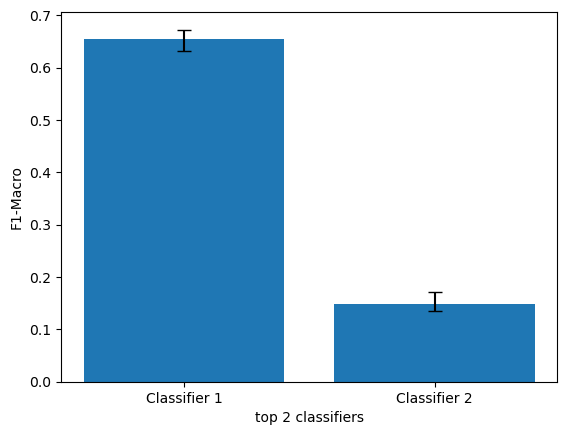

In [27]:
#use kfolds for different classifiers
scores1 = cross_val_score(clf1, X_train, y_train.values.ravel(), cv=kfolds, scoring='f1_macro')
scores2 = cross_val_score(clf2, X_train, y_train.values.ravel(), cv=kfolds, scoring='f1_macro')
m_score_1, ci_low1, ci_high1 = np.mean(scores1), np.percentile(scores1, 2.5), np.percentile(scores1, 97.5)
m_score_2, ci_low2, ci_high2 = np.mean(scores2), np.percentile(scores2, 2.5), np.percentile(scores2, 97.5)
print(f"Classifier 1 Mean F1-Macro: {m_score_1:.2f}, CI: ({ci_low1:.2f}, {ci_high1:.2f})")
print(f"Classifier 2 Mean F1-Macro: {m_score_2:.2f}, CI: ({ci_low2:.2f}, {ci_high2:.2f})")
plt.bar([1, 2], [m_score_1, m_score_2], yerr=[[m_score_1 - ci_low1, m_score_2 - ci_low2], [ci_high1 - m_score_1, ci_high2 - m_score_2]], capsize=5, tick_label=['Classifier 1', 'Classifier 2'])
plt.ylabel("F1-Macro")
plt.xlabel("top 2 classifiers")

In [28]:
from scipy import stats
tstat, p_val = stats.ttest_rel(scores1,scores2)
print(f"T-test p-value: {p_val:.4f}")
if p_val < 0.05:
    print("Difference between two classifiers is significant")

else: 
    print("No signnificant difference between the two classifiers")

T-test p-value: 0.0000
Difference between two classifiers is significant


Classifier 1 Mean F1-Macro: 0.64, CI: (0.56, 0.70)
Classifier 2 Mean F1-Macro: 0.14, CI: (0.13, 0.15)


Text(0.5, 0, 'top 2 classifiers')

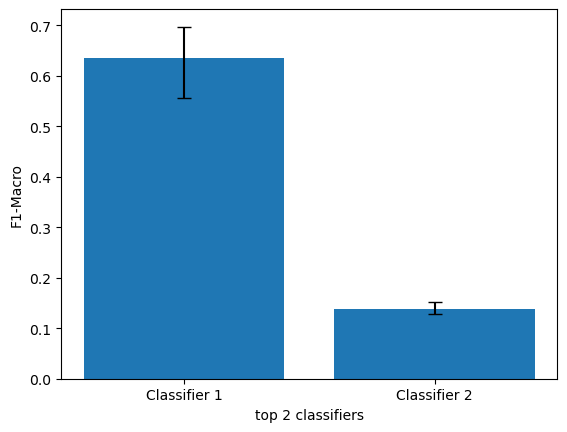

In [29]:
#use kfolds for different classifiers
scores1 = cross_val_score(clf1, X_test, y_test.values.ravel(), cv=kfolds, scoring='f1_macro')
scores2 = cross_val_score(clf2, X_test, y_test.values.ravel(), cv=kfolds, scoring='f1_macro')
m_score_1, ci_low1, ci_high1 = np.mean(scores1), np.percentile(scores1, 2.5), np.percentile(scores1, 97.5)
m_score_2, ci_low2, ci_high2 = np.mean(scores2), np.percentile(scores2, 2.5), np.percentile(scores2, 97.5)
print(f"Classifier 1 Mean F1-Macro: {m_score_1:.2f}, CI: ({ci_low1:.2f}, {ci_high1:.2f})")
print(f"Classifier 2 Mean F1-Macro: {m_score_2:.2f}, CI: ({ci_low2:.2f}, {ci_high2:.2f})")
plt.bar([1, 2], [m_score_1, m_score_2], yerr=[[m_score_1 - ci_low1, m_score_2 - ci_low2], [ci_high1 - m_score_1, ci_high2 - m_score_2]], capsize=5, tick_label=['Classifier 1', 'Classifier 2'])
plt.ylabel("F1-Macro")
plt.xlabel("top 2 classifiers")

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())
mlp_train_score = mlp.score(X_train, y_train.values.ravel())
mlp_test_score = mlp.score(X_test, y_test.values.ravel())
print("Accuracy on training set: {:.2f}".format(mlp_train_score))
print("Accuracy on test set: {:.2f}".format(mlp_test_score))

Accuracy on training set: 0.68
Accuracy on test set: 0.72


In [31]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=0, max_iter=1000)
regr.fit(X_train, y_train.values.ravel())
regr_train_score = regr.score(X_train, y_train.values.ravel())
regr_test_score = regr.score(X_test, y_test.values.ravel())
print("Accuracy on training set: {:.2f}".format(regr_train_score))
print("Accuracy on test set: {:.2f}".format(regr_test_score))

Accuracy on training set: 0.96
Accuracy on test set: 0.97


In [32]:
from sklearn.naive_bayes import GaussianNB
clf3= GaussianNB()
score_3 = cross_val_score(clf3, X_train, y_train.values.ravel(), cv = kfolds, scoring = "f1_macro")
print("Scores with MaxAbsScaler - ", score_3)

Scores with MaxAbsScaler -  [0.96657299 0.92531799 0.99296317 0.8558082  0.96306253]


In [33]:
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
kfolds = KFold(n_splits=10, shuffle=True, random_state=1234)
score_3 = cross_val_score(clf3, X_train, y_train.values.ravel(), cv = kfolds, scoring = "f1_macro")
print("Scores with MaxAbsScaler - ", score_3)

Scores with MaxAbsScaler -  [0.9654321  0.9668254  0.87782787 0.92358974 0.99488945 0.99003682
 0.8599252  0.83533006 0.95994889 0.95555556]


In [34]:
scores3 = cross_val_score(clf3, X_test, y_test.values.ravel(), cv=kfolds, scoring='f1_macro')
m_score_3, ci_low3, ci_high3 = np.mean(scores3), np.percentile(scores3, 2.5), np.percentile(scores3, 97.5)
print(f"Classifier 3 Mean F1-Macro: {m_score_3:.2f}, CI: ({ci_low3:.2f}, {ci_high3:.2f})")

Classifier 3 Mean F1-Macro: 0.89, CI: (0.74, 1.00)
